In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from word2number import w2n

In [14]:
df=pd.read_csv('hr_data.csv',)
df

,Unnamed: 0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,NaN,8.0,9,50000
1,1,NaN,8.0,6,45000
2,2,five,6.0,7,60000
3,3,two,10.0,10,65000
4,4,seven,9.0,6,70000
5,5,three,7.0,10,62000
6,6,ten,NaN,7,72000
7,7,eleven,7.0,8,80000


In [15]:
number_mapping = {
    'five': 5,
    'two': 2,
    'seven': 7,
    'three': 3,
    'ten': 10,
    'eleven': 11
}

df.loc[2] = df.loc[2].replace(number_mapping)
df.loc[3] = df.loc[3].replace(number_mapping)
df.loc[4] = df.loc[4].replace(number_mapping)
df.loc[5] = df.loc[5].replace(number_mapping)
df.loc[6] = df.loc[6].replace(number_mapping)
df.loc[7] = df.loc[7].replace(number_mapping)

df.to_csv('updated_hrData.csv', index=False)
df


,Unnamed: 0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,NaN,8.0,9,50000
1,1,NaN,8.0,6,45000
2,2,5.0,6.0,7,60000
3,3,2.0,10.0,10,65000
4,4,7.0,9.0,6,70000
5,5,3.0,7.0,10,62000
6,6,10.0,NaN,7,72000
7,7,11.0,7.0,8,80000


In [16]:
import math
median_test_score=math.floor(df['test_score(out of 10)'].median())
median_test_score

8

In [17]:
df.loc[0]=df.loc[0].fillna({'experience':1})
df

,Unnamed: 0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,1.0,8.0,9,50000
1,1,NaN,8.0,6,45000
2,2,5.0,6.0,7,60000
3,3,2.0,10.0,10,65000
4,4,7.0,9.0,6,70000
5,5,3.0,7.0,10,62000
6,6,10.0,NaN,7,72000
7,7,11.0,7.0,8,80000


In [18]:
df.loc[1]=df.loc[1].fillna({'experience':2})
df


,Unnamed: 0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,1.0,8.0,9,50000
1,1,2.0,8.0,6,45000
2,2,5.0,6.0,7,60000
3,3,2.0,10.0,10,65000
4,4,7.0,9.0,6,70000
5,5,3.0,7.0,10,62000
6,6,10.0,NaN,7,72000
7,7,11.0,7.0,8,80000


In [19]:
median_exp=math.floor(df['experience'].median())
median_exp

4

In [20]:
df.loc[0]=df.loc[0].fillna({'experience':median_exp})
df.to_csv('updated2_hr.csv',index=False)


In [21]:
df.loc[0].replace(11,0)
df

,Unnamed: 0,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,1.0,8.0,9,50000
1,1,2.0,8.0,6,45000
2,2,5.0,6.0,7,60000
3,3,2.0,10.0,10,65000
4,4,7.0,9.0,6,70000
5,5,3.0,7.0,10,62000
6,6,10.0,NaN,7,72000
7,7,11.0,7.0,8,80000


In [27]:
df.dropna(inplace=True)

In [28]:
reg=LinearRegression()
reg

LinearRegression()

In [29]:
print(df.isna().sum())

Unnamed: 0                    0
experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64


In [30]:
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df[['salary($)']])

LinearRegression()

In [31]:
reg.predict([[2,9,6]])

C:\Users\bdar1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[49954.2645241]])

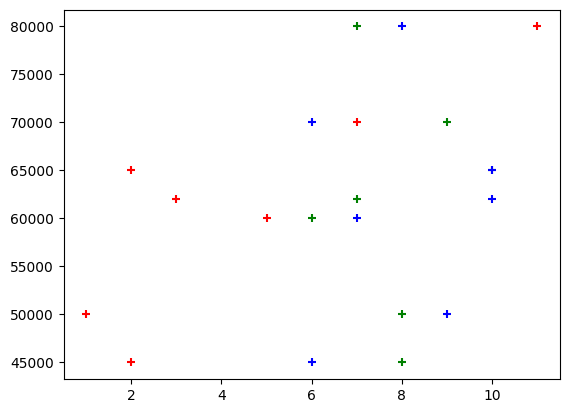

In [32]:
plt.scatter(df['experience'], df['salary($)'], label='Experience', color='red', marker='+')
plt.scatter(df['test_score(out of 10)'], df['salary($)'], label='Test_score(out of 10)', color='green', marker='+')
plt.scatter(df['interview_score(out of 10)'], df['salary($)'], label='Interview_score(out of 10)', color='blue', marker='+')

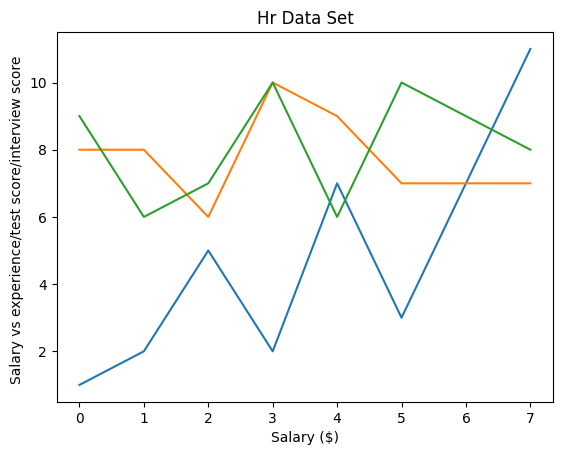

In [33]:
plt.xlabel('Salary ($)')
plt.ylabel('Salary vs experience/test score/interview score ')
plt.title('Hr Data Set')
plt.plot(df[['experience','test_score(out of 10)','interview_score(out of 10)']])
plt.show()